In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib as mat
from tabulate import tabulate
import warnings 
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("Flight_Dataset.csv")

In [6]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.shape

(300153, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [9]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


To separate Categorical and Numerical columns

In [10]:
def separate_data_type(df):
    categorical= []
    continuous = []
    for column in df.columns:
        if df[column].nunique()<20:
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous
    
categorical,continuous = separate_data_type(df)
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical       continuous
----------------  ------------
airline           flight
source_city       duration
departure_time    days_left
stops             price
arrival_time
destination_city
class


## CATEGORICAL COLUMNS

In [11]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") 
    print(f"Mode of {col} is {df[col].mode()[0]}") 
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") 

## 1) Airline 

In [12]:
info_of_cat("airline")

Unique values in airline are: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Mode of airline is Vistara
Number of missing values in airline is 0


In [13]:
df["airline"].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

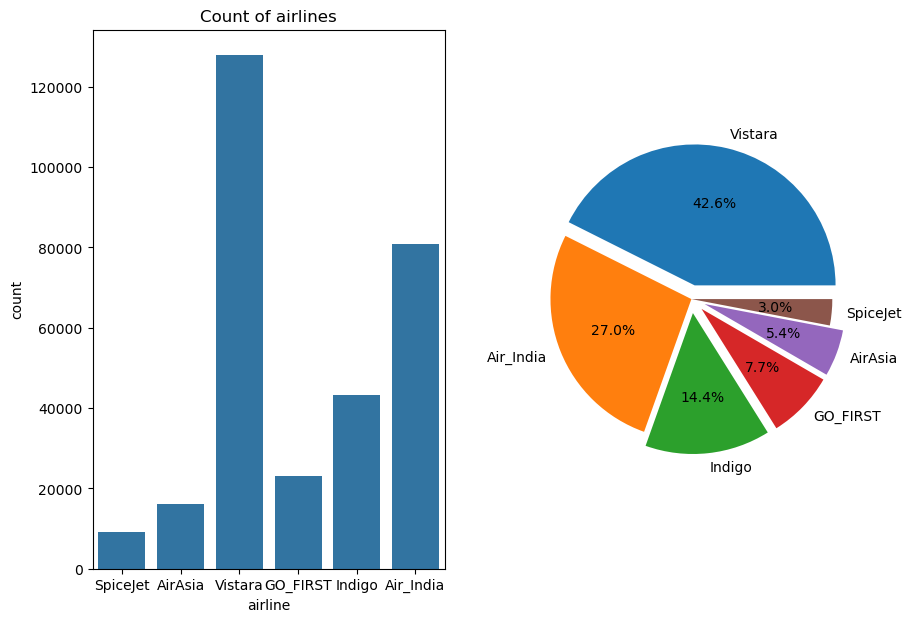

In [14]:
fig,ax = plt.subplots(1,2,figsize=(10,7))
ax[0].set_title('Count of airlines')
percentage = df["airline"].value_counts()
labels = list(percentage.index)

sns.countplot(x = df["airline"], ax = ax[0])
plt.pie(x = percentage, autopct = "%1.1f%%", explode= [0.1,0,0.1,0.1,0.1,0], labels = labels),
plt.show()

Insights - 
1) Vistara is the leading airline by a significant margin, holding 43% share of the total count.
2) Air India and Indigo have relatively smaller contributions than Vistara.
3) The remaining airlines GO_FIRST, AirAsia, and SpiceJet handle much fewer passengers, with SpiceJet having the smallest share. 

### Relationship between Airline and Price Column

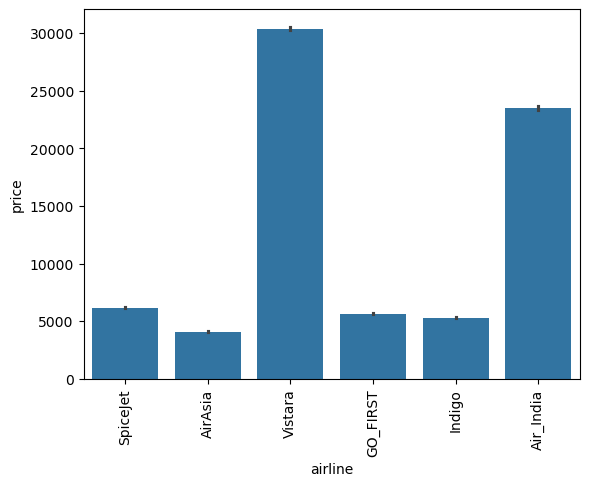

In [15]:
sns.barplot(x = df['airline'], y = df['price'])
plt.xticks(rotation = 'vertical')
plt.show()

### Interpretation : 
Vistara has the highest average flight price among all the airlines followed by Air India. 
SpiceJet, AirAsia, GO_FIRST, and Indigo have significantly lower average prices, likely targeting budget-conscious travelers.

## 2) Source_City

In [16]:
info_of_cat("source_city")

Unique values in source_city are: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Mode of source_city is Delhi
Number of missing values in source_city is 0


In [17]:
df["source_city"].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

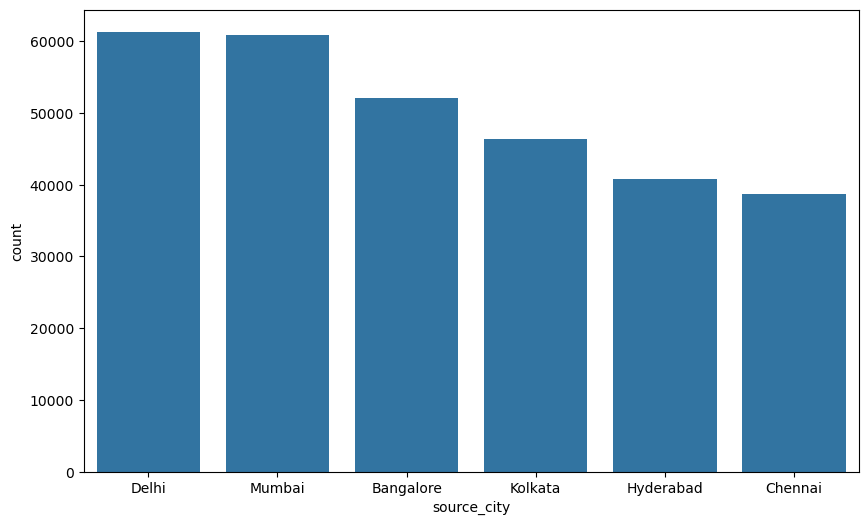

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x = df["source_city"])
plt.show()

Interpretation : Delhi and Mumbai are major hubs for activity, possibly due to higher passenger numbers, demand, or connectivity. Hyderabad and Chennai, while still significant, have comparatively lower contributions.

### Relationship between Source City and Price Column

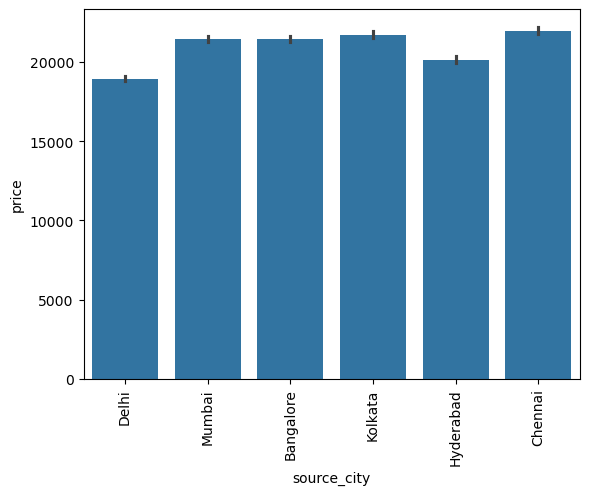

In [19]:
sns.barplot(x = df['source_city'], y = df['price'])
plt.xticks(rotation = 'vertical')
plt.show()

### Interpretation : 
Chennai has the highest average flight price among the cities and Delhi has the lowest average flight price. 
The other cities (Mumbai, Bangalore, Kolkata, and Hyderabad) have similar average flight prices, which are higher than Delhi's but slightly lower than Chennai's.

## 3) Departure_Time

In [20]:
info_of_cat("departure_time")

Unique values in departure_time are: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Mode of departure_time is Morning
Number of missing values in departure_time is 0


In [21]:
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

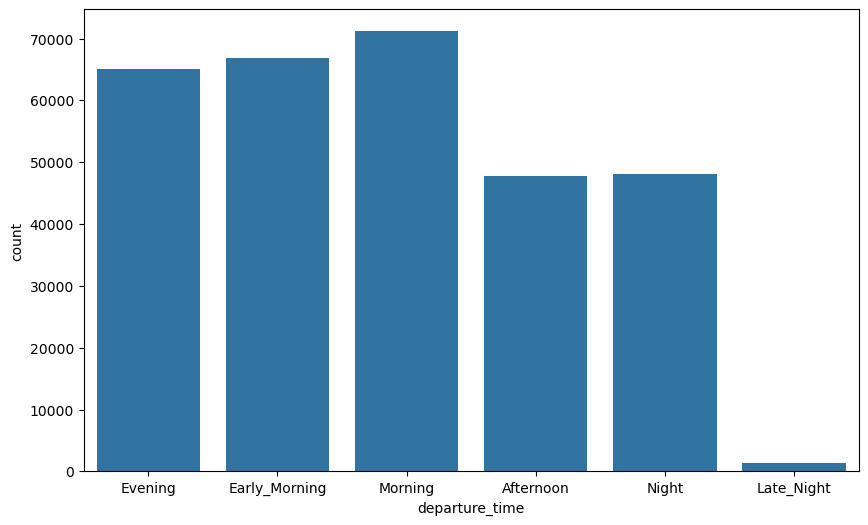

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x = df["departure_time"])
plt.show()

Interpretation : Morning, Early Morning, and Evening are the peak times for flight departures. Late Night has the lowest count, indicating that departures during this time are relatively rare.

### Relationship between Departure time and Price column 

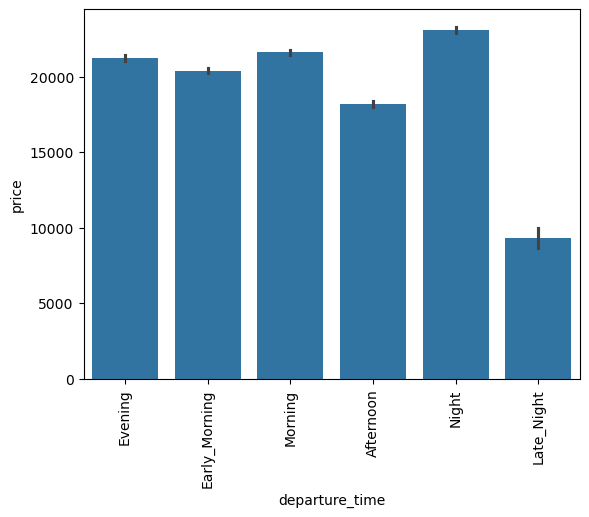

In [23]:
sns.barplot(x = df['departure_time'], y = df['price'])
plt.xticks(rotation = 'vertical')
plt.show()

### Interpretation : 
Night departures have the highest average flight price, indicating higher demand or fewer flight options during that time.
Late Night departures have the lowest average flight price, suggesting they are less preferred by passengers
Evening, Morning, and Early Morning departures have relatively similar prices, slightly lower than Night departures but higher than Late Night.
Afternoon departures have moderately high prices but are generally cheaper than Night departures.


## 4) Stops

In [24]:
info_of_cat("stops")

Unique values in stops are: ['zero' 'one' 'two_or_more']
Mode of stops is one
Number of missing values in stops is 0


In [107]:
df['stops'].value_counts()

stops
1    249379
0     36004
2     12422
Name: count, dtype: int64

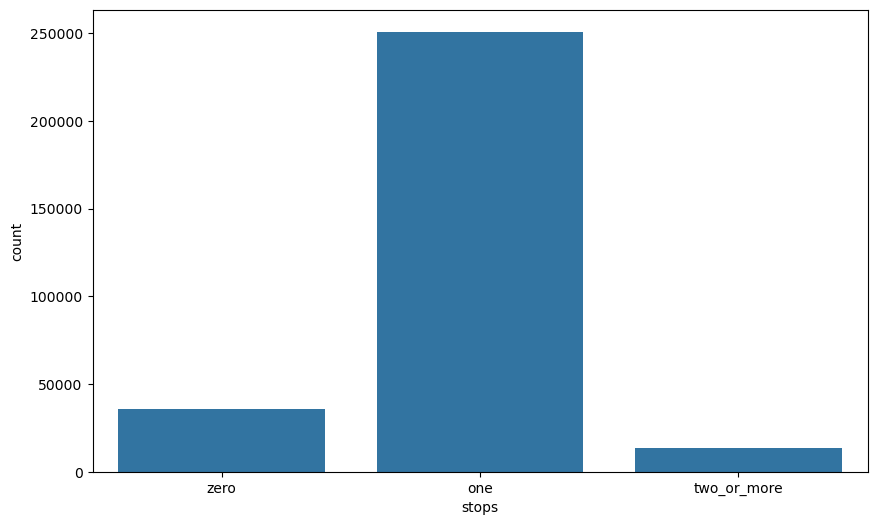

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x = df["stops"])
plt.show()

Insights : Flights with one stop dominate the travel options, possibly due to their balance between cost and convenience. Zero Stops (Non-stop flights) count is significantly lower than flights with one stop. These flights are likely favored by those prioritizing direct travel. Flights with two or more stops are rare, likely due to longer travel times and decreased convenience.  

In [26]:
df['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2}) 

0         0
1         0
2         0
3         0
4         0
         ..
300148    1
300149    1
300150    1
300151    1
300152    1
Name: stops, Length: 300153, dtype: int64

In [27]:
df['stops'] = df['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2})

In [28]:
df['stops'].unique()

array([0, 1, 2], dtype=int64)

In [29]:
df['stops'].astype(int)

0         0
1         0
2         0
3         0
4         0
         ..
300148    1
300149    1
300150    1
300151    1
300152    1
Name: stops, Length: 300153, dtype: int32

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 25.2+ MB


### Relationship between Stops and Price Column 

<Axes: xlabel='stops', ylabel='price'>

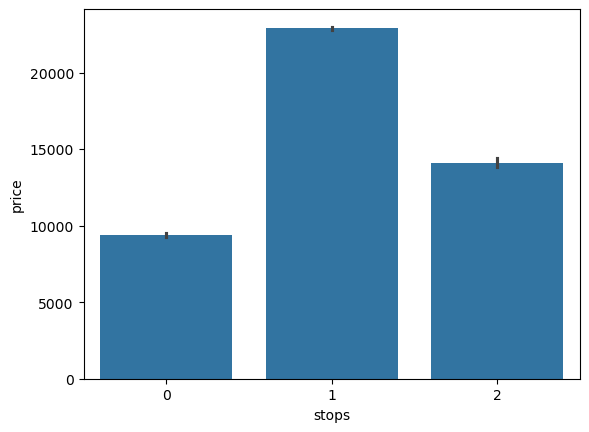

In [31]:
sns.barplot(x = df['stops'], y = df['price'])


### Interpretation : 
Stops with 1 have the highest price, indicating that services with one stop are more expensive compared to non-stop (0 stops) or two-stop services.
Stops with 0 have the lowest price, showing that non-stop services are the most cost-effective option.
Stops with 2 have a price higher than non-stop services but lower than one-stop services.

## 5) Destination_City

In [32]:
info_of_cat("destination_city")

Unique values in destination_city are: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
Mode of destination_city is Mumbai
Number of missing values in destination_city is 0


In [33]:
df['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

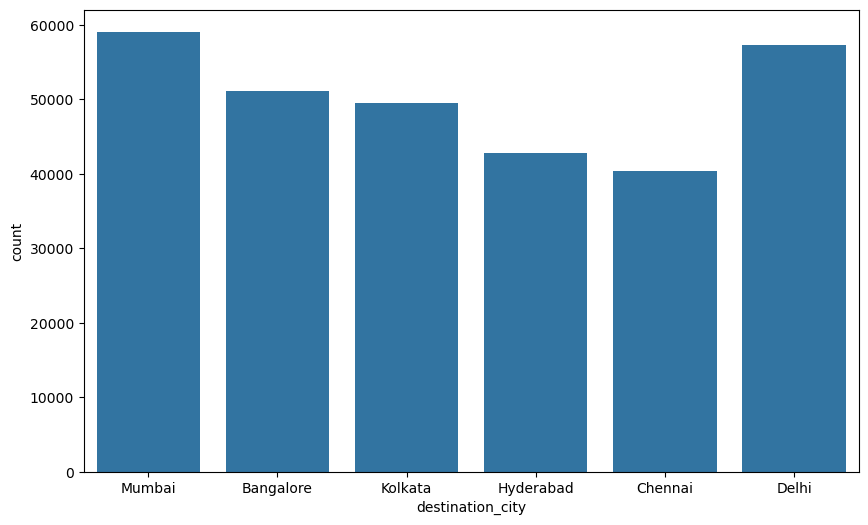

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x = df["destination_city"])
plt.show()

### Interpretation : 
Mumbai and Delhi have the highest counts among all destination cities, indicating they are the most popular destinations in the dataset.
Chennai has the lowest count, suggesting it is the least popular destination in comparison to the others.
The counts for Bangalore, Kolkata, and Hyderabad are moderately high and close to each other but lower than Mumbai and Delhi.


### Relationship between Destination City and Price column 

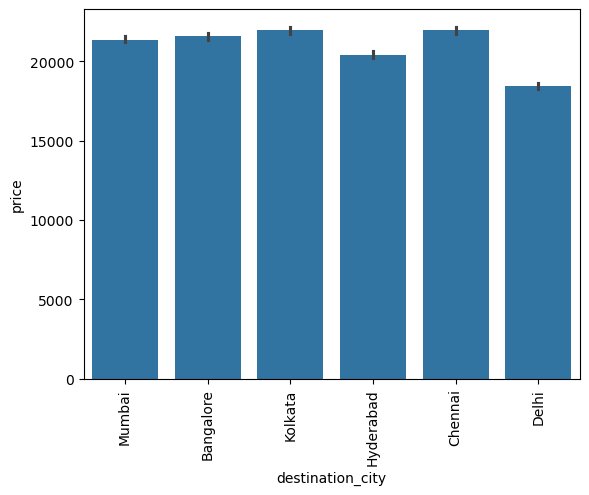

In [35]:
sns.barplot(x = df['destination_city'], y = df['price'])
plt.xticks(rotation = 'vertical')
plt.show()

### Interpretation : 

## 6) Arrival_Time

In [36]:
info_of_cat("arrival_time")

Unique values in arrival_time are: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
Mode of arrival_time is Night
Number of missing values in arrival_time is 0


In [37]:
df['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

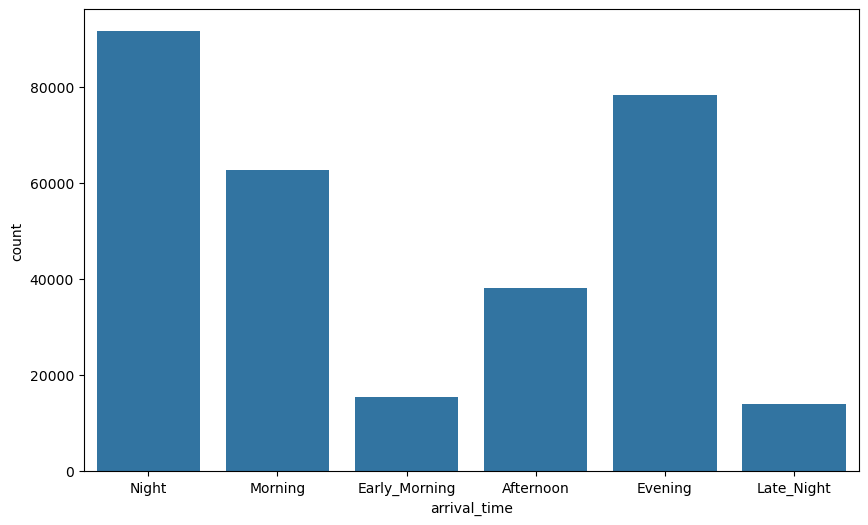

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x = df["arrival_time"])
plt.show()

### Interpretation : 

### Relationship between Arrival Time and Price column 

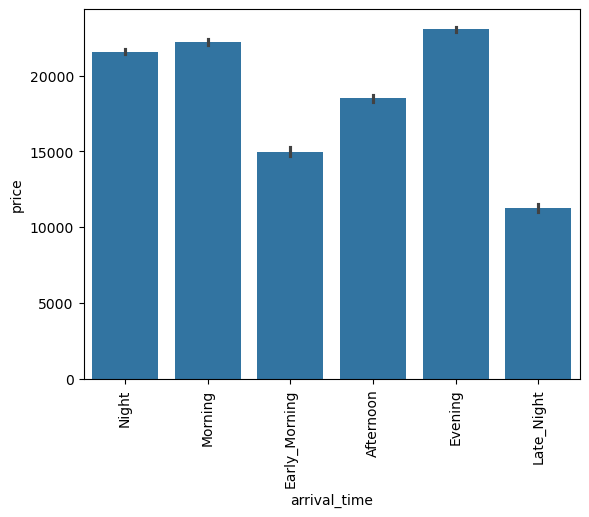

In [39]:
sns.barplot(x = df['arrival_time'], y = df['price'])
plt.xticks(rotation = 'vertical')
plt.show()

### Interpretation : 

## 7) Class 

In [40]:
info_of_cat('class')

Unique values in class are: ['Economy' 'Business']
Mode of class is Economy
Number of missing values in class is 0


In [41]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

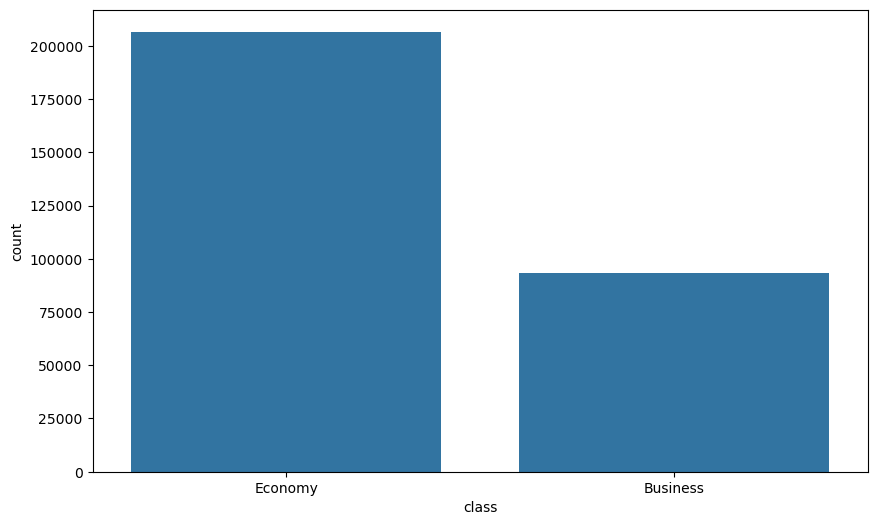

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x = df["class"])
plt.show()

### Interpretation : 

### Relationship between Class and Price Column 

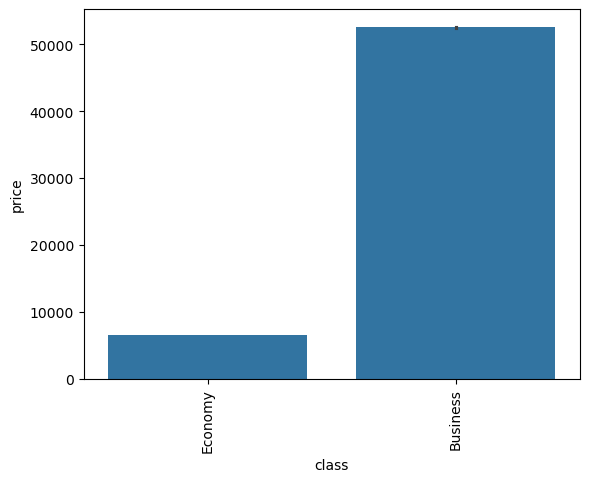

In [43]:
sns.barplot(x = df['class'], y = df['price'])
plt.xticks(rotation = 'vertical')
plt.show()

### Interpretation : 

## Numerical Columns 

## 1) Flight

In [44]:
df['flight'].nunique()

1561

In [45]:
df['flight'].unique()

array(['SG-8709', 'SG-8157', 'I5-764', ..., '6E-7127', '6E-7259',
       'AI-433'], dtype=object)

In [46]:
df.drop(columns = ['flight'], inplace = True)

In [47]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


## 2) Duration

<Axes: ylabel='duration'>

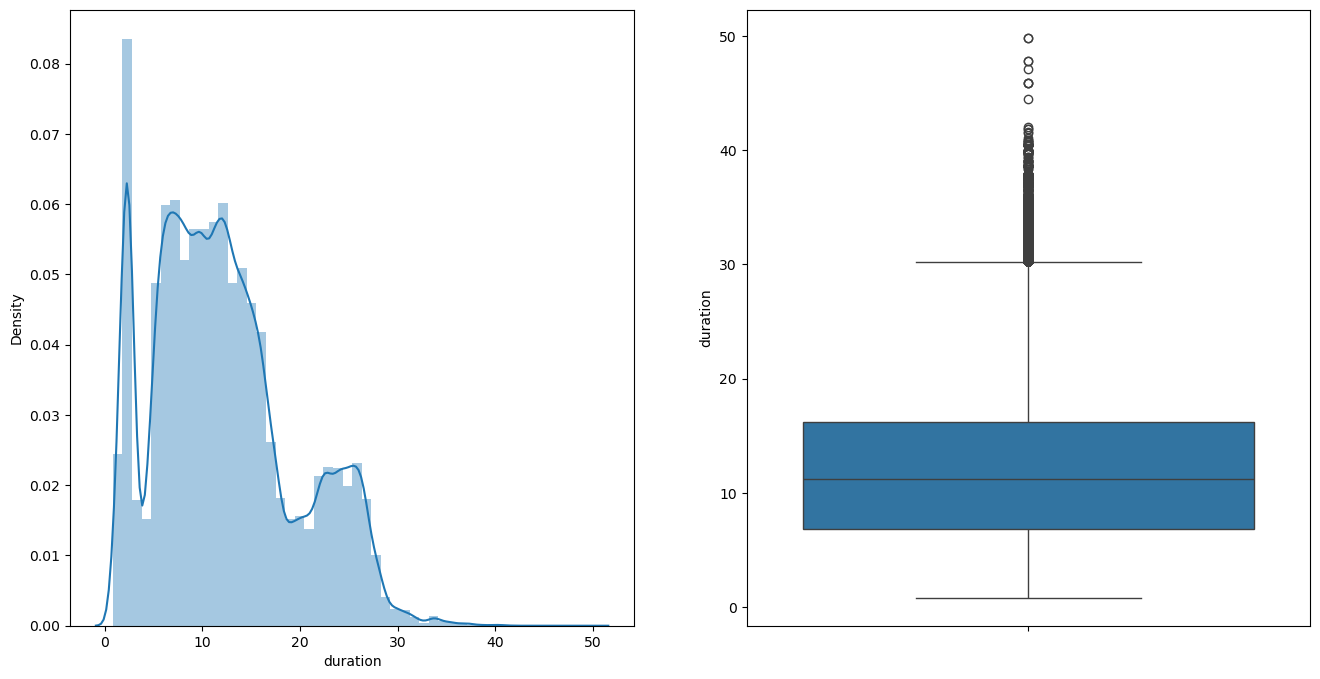

In [48]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(df['duration'])

plt.subplot(1,2,2)
sns.boxplot(df['duration'])

In [49]:
df['duration'].describe()

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

In [50]:
percentile25 = df['duration'].quantile(0.25)
percentile75 = df['duration'].quantile(0.75)

In [51]:
percentile75

16.17

In [52]:
percentile25

6.83

In [53]:
IQR =  percentile75 - percentile25

In [54]:
IQR 

9.340000000000002

In [55]:
# Finidng outliers 
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [56]:
upper_limit

30.180000000000003

In [57]:
lower_limit

-7.1800000000000015

In [58]:
df[df['duration'] > upper_limit]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
10534,Vistara,Delhi,Afternoon,2,Night,Bangalore,Economy,31.25,4,12222
10535,Vistara,Delhi,Afternoon,2,Night,Bangalore,Economy,33.17,4,12222
10540,Air_India,Delhi,Early_Morning,2,Evening,Bangalore,Economy,36.92,4,12321
10891,Vistara,Delhi,Afternoon,2,Night,Bangalore,Economy,31.25,6,12222
10892,Vistara,Delhi,Afternoon,2,Night,Bangalore,Economy,33.17,6,12222
...,...,...,...,...,...,...,...,...,...,...
296064,Air_India,Chennai,Early_Morning,1,Afternoon,Kolkata,Business,30.33,5,55377
296297,Air_India,Chennai,Early_Morning,1,Afternoon,Kolkata,Business,30.33,10,55377
296391,Air_India,Chennai,Early_Morning,1,Afternoon,Kolkata,Business,30.33,12,55377
296716,Air_India,Chennai,Early_Morning,1,Afternoon,Kolkata,Business,30.33,19,55377


In [59]:
df[df['duration'] < lower_limit]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


In [60]:
# Trimming Outliers
df = df[df['duration'] < upper_limit]

In [61]:
df.shape

(298043, 10)

<Axes: ylabel='duration'>

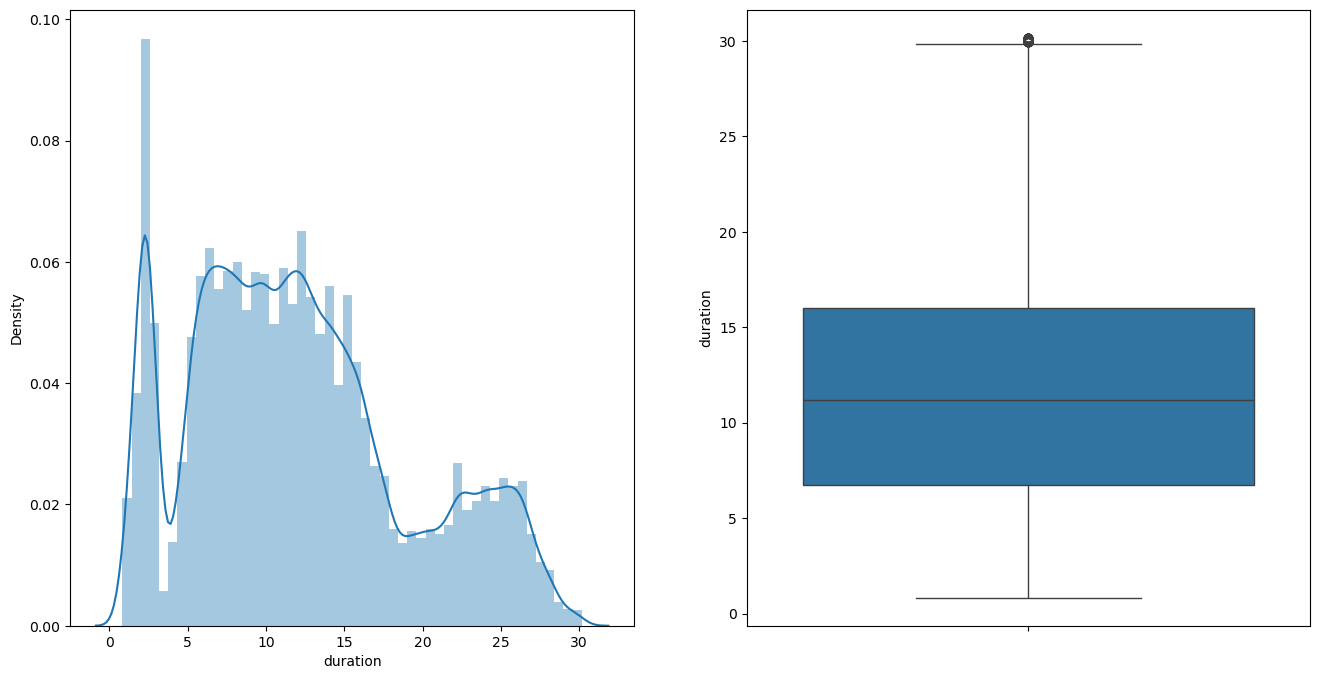

In [62]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(df['duration'])

plt.subplot(1,2,2)
sns.boxplot(df['duration'])

In [63]:
df[df['duration'] >=  30.00]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
114,Air_India,Delhi,Morning,1,Afternoon,Mumbai,Economy,30.08,1,24540
357,Air_India,Delhi,Morning,1,Afternoon,Mumbai,Economy,30.08,3,15405
546,Air_India,Delhi,Morning,1,Afternoon,Mumbai,Economy,30.08,4,15720
724,Air_India,Delhi,Morning,1,Afternoon,Mumbai,Economy,30.08,5,15405
907,Air_India,Delhi,Morning,1,Afternoon,Mumbai,Economy,30.08,6,15405
...,...,...,...,...,...,...,...,...,...,...
283057,Air_India,Hyderabad,Early_Morning,1,Afternoon,Kolkata,Business,30.00,3,53364
283372,Air_India,Hyderabad,Early_Morning,1,Afternoon,Kolkata,Business,30.00,10,51707
283695,Air_India,Hyderabad,Early_Morning,1,Afternoon,Kolkata,Business,30.00,17,51707
283788,Air_India,Hyderabad,Early_Morning,1,Afternoon,Kolkata,Business,30.00,19,51707


In [64]:
df = df[df['duration'] <= 30.00]

In [65]:
df.shape

(297927, 10)

<Axes: ylabel='duration'>

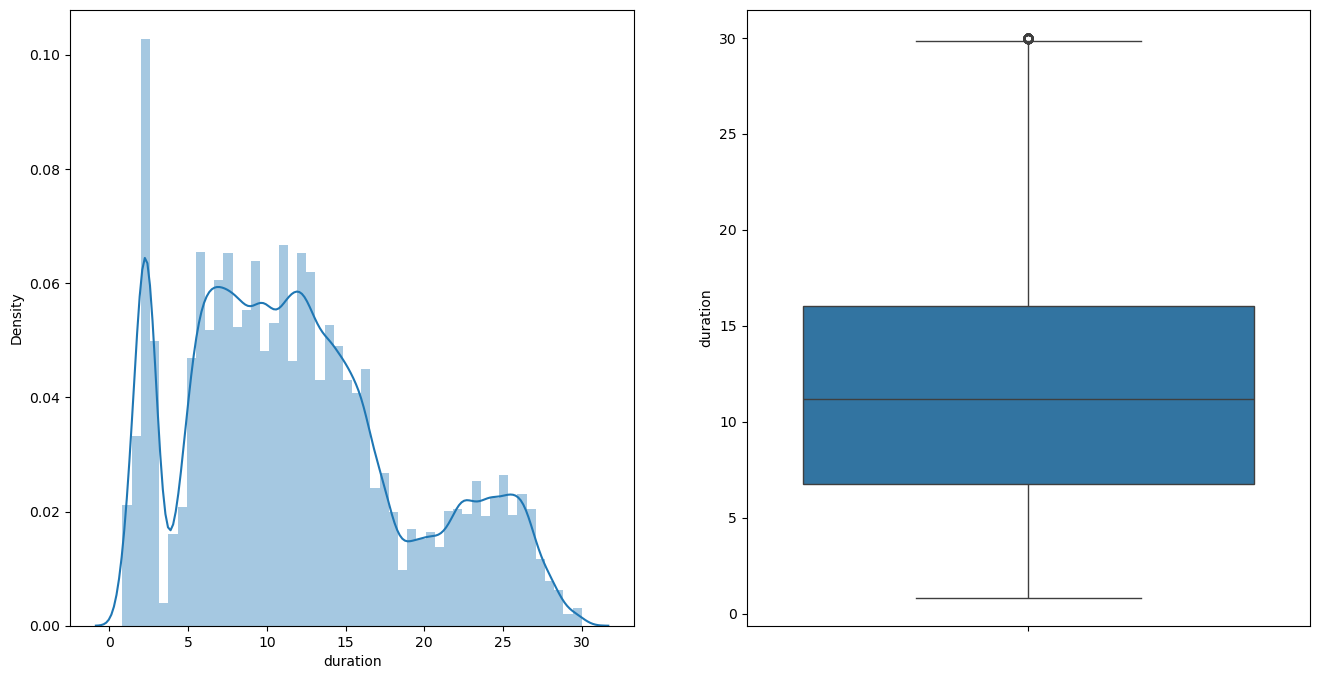

In [66]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(df['duration'])

plt.subplot(1,2,2)
sns.boxplot(df['duration'])

In [67]:
df['duration'].corr(df['price'])

0.21529367245385925

<Axes: xlabel='duration', ylabel='price'>

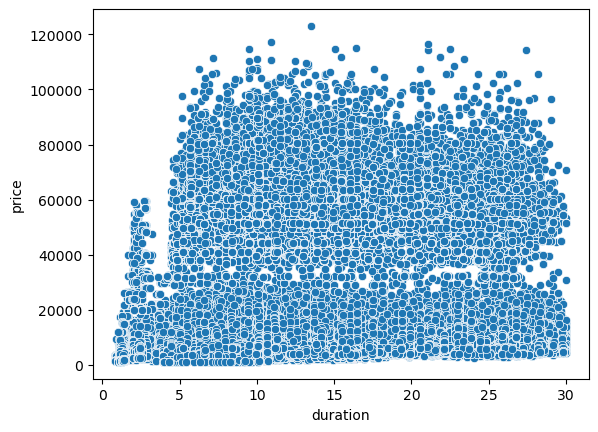

In [68]:
sns.scatterplot(x = df['duration'], y = df['price'])

# 3) Days_Left 

<Axes: ylabel='days_left'>

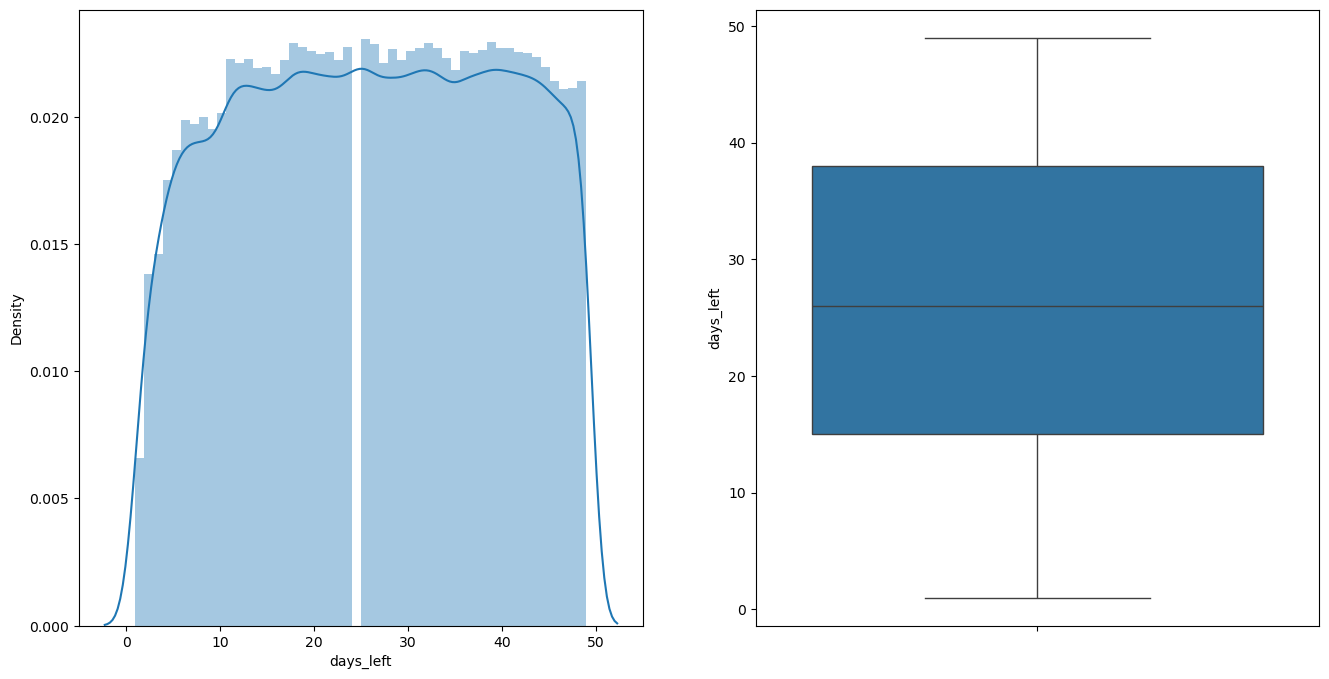

In [69]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(df['days_left'])

plt.subplot(1,2,2)
sns.boxplot(df['days_left'])

In [70]:
df['days_left'].corr(df['price'])

-0.09247490427716668

In [71]:
df.sample(10)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
51210,Indigo,Mumbai,Late_Night,1,Morning,Delhi,Economy,10.33,42,2339
13305,AirAsia,Delhi,Afternoon,1,Night,Bangalore,Economy,11.50,18,5220
265240,Air_India,Kolkata,Night,1,Morning,Mumbai,Business,11.33,20,43711
30543,Vistara,Delhi,Evening,1,Morning,Hyderabad,Economy,13.25,16,5761
104459,GO_FIRST,Bangalore,Afternoon,2,Early_Morning,Kolkata,Economy,16.25,14,12920
242111,Air_India,Mumbai,Early_Morning,1,Evening,Chennai,Business,11.00,11,49613
288229,Air_India,Chennai,Morning,0,Afternoon,Delhi,Business,3.08,13,27792
38272,Vistara,Delhi,Afternoon,2,Morning,Chennai,Economy,19.50,21,7490
109505,Vistara,Bangalore,Early_Morning,2,Evening,Kolkata,Economy,12.00,48,8913
95749,Air_India,Bangalore,Evening,1,Late_Night,Mumbai,Economy,5.17,12,8644


### 4) Price 

<Axes: ylabel='price'>

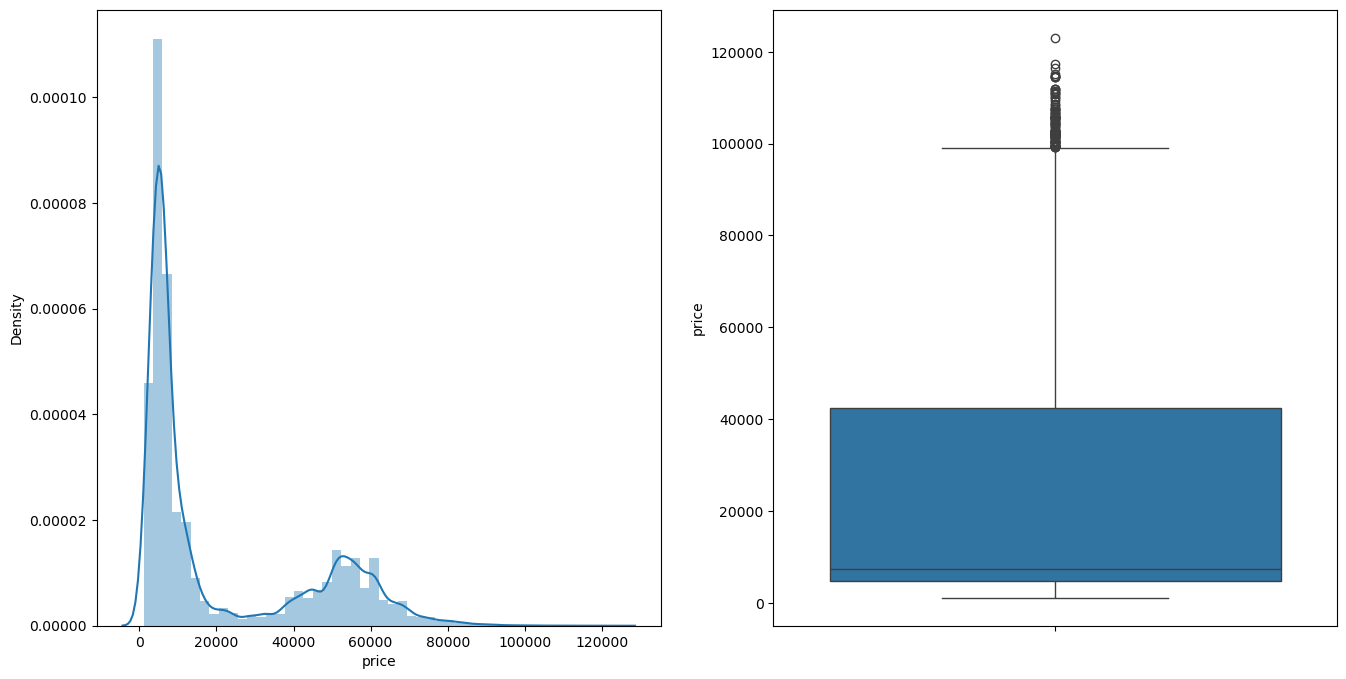

In [72]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(df['price'])

plt.subplot(1,2,2)
sns.boxplot(df['price'])

In [73]:
percentile25 = df['price'].quantile(0.25)
percentile75 = df['price'].quantile(0.75)

In [74]:
percentile25

4757.0

In [75]:
df.describe()

,stops,duration,days_left,price
count,297927.000000,297927.000000,297927.000000,297927.000000
mean,0.920940,12.065643,26.033760,20916.259446
std,0.395458,6.985934,13.552563,22733.112777
min,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,6.750000,15.000000,4757.000000
50%,1.000000,11.170000,26.000000,7424.000000
75%,1.000000,16.000000,38.000000,42521.000000
max,2.000000,30.000000,49.000000,123071.000000


In [76]:
IQR =  percentile75 - percentile25

In [77]:
IQR

37764.0

In [78]:
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [79]:
upper_limit

99167.0

In [80]:
lower_limit

-51889.0

In [81]:
df[df['price'] > upper_limit]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
215858,Vistara,Delhi,Evening,2,Evening,Kolkata,Business,21.08,1,114434
215859,Vistara,Delhi,Evening,2,Evening,Kolkata,Business,21.08,1,116562
216025,Vistara,Delhi,Evening,2,Morning,Kolkata,Business,17.58,4,100395
216095,Vistara,Delhi,Morning,1,Evening,Kolkata,Business,8.00,5,101369
216096,Vistara,Delhi,Early_Morning,2,Evening,Kolkata,Business,10.92,5,117307
...,...,...,...,...,...,...,...,...,...,...
293474,Vistara,Chennai,Morning,1,Night,Bangalore,Business,9.67,3,107597
296001,Vistara,Chennai,Night,1,Morning,Kolkata,Business,11.50,3,102832
296081,Vistara,Chennai,Early_Morning,1,Night,Kolkata,Business,15.83,5,102384
296170,Vistara,Chennai,Night,1,Morning,Kolkata,Business,11.50,7,104624


In [82]:
df = df[df['price'] < upper_limit]

<Axes: ylabel='price'>

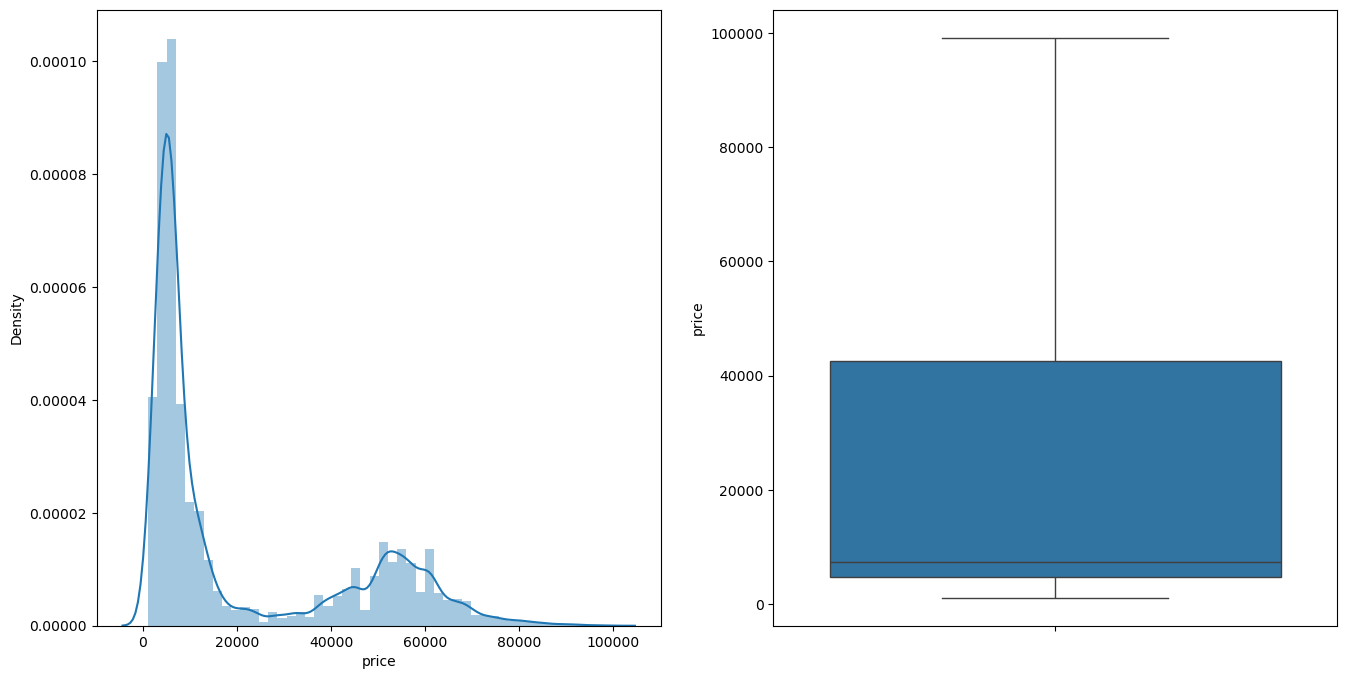

In [84]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(df['price'])

plt.subplot(1,2,2)
sns.boxplot(df['price'])

In [108]:
X = df.drop(columns = ['price'])
y = np.log(df['price'])

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size =0.15 , random_state = 2)

In [110]:
X_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
142901,Indigo,Kolkata,Morning,1,Night,Hyderabad,Economy,8.83,5
217799,Vistara,Delhi,Afternoon,1,Morning,Kolkata,Business,18.17,30
114963,GO_FIRST,Bangalore,Afternoon,1,Late_Night,Hyderabad,Economy,8.42,45
258776,Vistara,Bangalore,Morning,1,Night,Hyderabad,Business,13.17,46
266587,Vistara,Kolkata,Morning,1,Night,Mumbai,Business,10.00,38
...,...,...,...,...,...,...,...,...,...
33943,AirAsia,Delhi,Night,1,Morning,Hyderabad,Economy,12.00,40
84809,Indigo,Bangalore,Early_Morning,0,Early_Morning,Delhi,Economy,2.92,6
96229,Vistara,Bangalore,Morning,0,Morning,Mumbai,Economy,1.92,15
205184,Air_India,Chennai,Morning,1,Night,Hyderabad,Economy,11.67,32


In [111]:
y_train

142901     9.915614
217799    11.090248
114963     8.381603
258776    10.943552
266587    11.305704
            ...    
33943      7.998671
84809      8.921057
96229      8.572439
205184     8.714403
101293     8.883502
Name: price, Length: 253134, dtype: float64

In [112]:
X_test

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
201615,Indigo,Chennai,Late_Night,2,Morning,Kolkata,Economy,7.67,40
61715,Indigo,Mumbai,Morning,1,Night,Kolkata,Economy,10.92,2
270235,Vistara,Kolkata,Afternoon,1,Night,Bangalore,Business,8.00,49
132444,AirAsia,Kolkata,Morning,1,Late_Night,Mumbai,Economy,14.92,32
63749,GO_FIRST,Mumbai,Early_Morning,0,Early_Morning,Kolkata,Economy,2.50,15
...,...,...,...,...,...,...,...,...,...
204925,Indigo,Chennai,Afternoon,0,Evening,Hyderabad,Economy,1.33,30
58712,Air_India,Mumbai,Early_Morning,1,Morning,Bangalore,Economy,25.83,34
267345,Air_India,Kolkata,Morning,1,Night,Bangalore,Business,9.67,2
261149,Air_India,Bangalore,Early_Morning,1,Evening,Chennai,Business,11.33,47


In [113]:
y_test

201615     7.788212
61715      9.748236
270235    11.018268
132444     8.125335
63749      8.910856
            ...    
204925     7.346655
58712      8.713089
267345    11.054344
261149    10.707326
19556      8.295798
Name: price, Length: 44671, dtype: float64

In [114]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso

# Linear Regression

In [115]:
Col_trans = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5,6])
],remainder='passthrough')

LR= LinearRegression()

pipe = Pipeline([
    ('Column_transformed',Col_trans),
    ('LinearRegression',LR)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.9147497595077093
MAE 0.25596574043056214


In [116]:
y_test

201615     7.788212
61715      9.748236
270235    11.018268
132444     8.125335
63749      8.910856
            ...    
204925     7.346655
58712      8.713089
267345    11.054344
261149    10.707326
19556      8.295798
Name: price, Length: 44671, dtype: float64

In [117]:
y_pred

array([ 8.7639151 ,  9.00733744, 10.72058078, ..., 11.30725065,
       10.47405125,  8.23367082])

In [118]:


# Convert to DataFrame for better visualization
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display first 10 rows
comparison.head(10)


,Actual,Predicted
201615,7.788212,8.763915
61715,9.748236,9.007337
270235,11.018268,10.720581
132444,8.125335,8.297460
63749,8.910856,8.383509
98842,8.789965,8.850590
290441,11.486006,11.146763
247840,10.952227,10.680659
288396,11.077965,10.994625
182588,8.511376,8.966466


# Ridge Regression 

In [119]:
Col_trans = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5,6])
],remainder='passthrough')

Ridge = Ridge(alpha=10)

pipe = Pipeline([
    ('Column_transformed',Col_trans),
    ('Ridge_regression',Ridge)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9147495346654733
MAE 0.2559781982761111


In [127]:
y_test_og = np.exp(y_test)
y_pred_og = np.exp(y_pred)

In [128]:
comparison = pd.DataFrame({'Actual': y_test_og, 'Predicted': y_pred_og})

In [129]:
comparison.head(10)

,Actual,Predicted
201615,2412.0,6394.283575
61715,17124.0,8163.068685
270235,60978.0,45258.704085
132444,3379.0,4020.290356
63749,7412.0,4374.492720
98842,6568.0,6978.896874
290441,97344.0,69324.941581
247840,57081.0,43488.453949
288396,64729.0,59533.618416
182588,4971.0,7834.672995


# Random Forest Regression 

In [133]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
Col_trans = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5,6])
],remainder='passthrough')

RandomForest = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('Column_transformed',Col_trans),
    ('RF_Regression',RandomForest)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9747323305228416
MAE 0.1167087680589033


In [135]:
y_test_og = np.exp(y_test)
y_pred_og = np.exp(y_pred)
comparison = pd.DataFrame({'Actual': y_test_og, 'Predicted': y_pred_og})
comparison.head()

,Actual,Predicted
201615,2412.0,3239.524166
61715,17124.0,14357.808174
270235,60978.0,61531.905454
132444,3379.0,3541.107838
63749,7412.0,6593.400474


# Decision Tree Regressor 

In [136]:
from sklearn.tree import DecisionTreeRegressor

In [137]:
Col_trans = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5,6])
],remainder='passthrough')

Decision = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('Column_transformed',Col_trans),
    ('DecisionTree_Regression',Decision)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9507826052117899
MAE 0.17618749705752887


In [138]:
y_test_og = np.exp(y_test)
y_pred_og = np.exp(y_pred)
comparison = pd.DataFrame({'Actual': y_test_og, 'Predicted': y_pred_og})
comparison.head()


,Actual,Predicted
201615,2412.0,4032.755594
61715,17124.0,12524.052715
270235,60978.0,60380.955231
132444,3379.0,3041.674101
63749,7412.0,6406.937739
